## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = keras.layers.Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = keras.layers.Dropout(drp_ratio)(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.0, 0.1, 0.15, 0.2, 0.25]
NEURONS = [[512, 256, 128], [512, 256, 128, 128], [512, 256, 128, 128, 128], [512, 256, 128, 128, 128, 128]]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ratio, n_neurons in itertools.product(Dropout_EXP, NEURONS):
    keras.backend.clear_session()
    print('Experiment with neurons=%s, drop_ratio=%.6f' %(n_neurons, dropout_ratio))
    model = build_mlp(x_train.shape[1:], num_neurons=n_neurons, drp_ratio=dropout_ratio)
    model.summary()
    
    opt = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'neurons=%s, drop_ratio=%.6f' %(n_neurons, dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with neurons=[512, 256, 128], drop_ratio=0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________________________________________

50000/50000 [==============================] - 11s 223us/step - loss: 0.6975 - accuracy: 0.7507 - val_loss: 1.6922 - val_accuracy: 0.5275
Epoch 46/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.6781 - accuracy: 0.7588 - val_loss: 1.7362 - val_accuracy: 0.5188
Epoch 47/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.6586 - accuracy: 0.7659 - val_loss: 1.7624 - val_accuracy: 0.5087
Epoch 48/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.6566 - accuracy: 0.7676 - val_loss: 1.7476 - val_accuracy: 0.5199
Epoch 49/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.6350 - accuracy: 0.7740 - val_loss: 1.8026 - val_accuracy: 0.5098
Epoch 50/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.6259 - accuracy: 0.7765 - val_loss: 1.8115 - val_accuracy: 0.5193
Experiment with neurons=[512, 256, 128, 128], drop_ratio=0.000000
Model: "model_1"
_____________________________

Epoch 38/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.7994 - accuracy: 0.7126 - val_loss: 1.5646 - val_accuracy: 0.5241
Epoch 39/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.7728 - accuracy: 0.7223 - val_loss: 1.5788 - val_accuracy: 0.5197
Epoch 40/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.7589 - accuracy: 0.7275 - val_loss: 1.6884 - val_accuracy: 0.5071
Epoch 41/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.7536 - accuracy: 0.7317 - val_loss: 1.6127 - val_accuracy: 0.5179
Epoch 42/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.7303 - accuracy: 0.7393 - val_loss: 1.6938 - val_accuracy: 0.5119
Epoch 43/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.7251 - accuracy: 0.7387 - val_loss: 1.7041 - val_accuracy: 0.5176
Epoch 44/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.7043 - accuracy:

50000/50000 [==============================] - 12s 236us/step - loss: 0.9626 - accuracy: 0.6538 - val_loss: 1.4738 - val_accuracy: 0.5147
Epoch 29/50
50000/50000 [==============================] - 12s 248us/step - loss: 0.9385 - accuracy: 0.6648 - val_loss: 1.4701 - val_accuracy: 0.5225
Epoch 30/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.9246 - accuracy: 0.6676 - val_loss: 1.4856 - val_accuracy: 0.5173
Epoch 31/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.9105 - accuracy: 0.6727 - val_loss: 1.5430 - val_accuracy: 0.5083
Epoch 32/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.8897 - accuracy: 0.6782 - val_loss: 1.5170 - val_accuracy: 0.5191
Epoch 33/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.8628 - accuracy: 0.6882 - val_loss: 1.5762 - val_accuracy: 0.5125
Epoch 34/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.8539 - accuracy: 0.6920 - va

50000/50000 [==============================] - 12s 244us/step - loss: 1.2055 - accuracy: 0.5665 - val_loss: 1.3908 - val_accuracy: 0.5147
Epoch 18/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.1843 - accuracy: 0.5750 - val_loss: 1.4388 - val_accuracy: 0.4993
Epoch 19/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.1619 - accuracy: 0.5849 - val_loss: 1.4045 - val_accuracy: 0.5039
Epoch 20/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.1407 - accuracy: 0.5878 - val_loss: 1.3787 - val_accuracy: 0.5181
Epoch 21/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.1174 - accuracy: 0.5983 - val_loss: 1.3995 - val_accuracy: 0.5124
Epoch 22/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.0981 - accuracy: 0.6055 - val_loss: 1.4245 - val_accuracy: 0.5140
Epoch 23/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.0703 - accuracy: 0.6143 - va

50000/50000 [==============================] - 12s 244us/step - loss: 1.4530 - accuracy: 0.4779 - val_loss: 1.4620 - val_accuracy: 0.4766
Epoch 12/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.4346 - accuracy: 0.4856 - val_loss: 1.4202 - val_accuracy: 0.4950
Epoch 13/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.4173 - accuracy: 0.4934 - val_loss: 1.4145 - val_accuracy: 0.4922
Epoch 14/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.4123 - accuracy: 0.4930 - val_loss: 1.4122 - val_accuracy: 0.4946
Epoch 15/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.3996 - accuracy: 0.4965 - val_loss: 1.4125 - val_accuracy: 0.4964
Epoch 16/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.3830 - accuracy: 0.5040 - val_loss: 1.4132 - val_accuracy: 0.4916
Epoch 17/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.3714 - accuracy: 0.5083 - va

50000/50000 [==============================] - 12s 245us/step - loss: 1.7298 - accuracy: 0.3799 - val_loss: 1.6831 - val_accuracy: 0.3921
Epoch 4/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.6732 - accuracy: 0.4003 - val_loss: 1.5976 - val_accuracy: 0.4294
Epoch 5/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.6229 - accuracy: 0.4202 - val_loss: 1.5654 - val_accuracy: 0.4368
Epoch 6/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.5934 - accuracy: 0.4292 - val_loss: 1.5402 - val_accuracy: 0.4554
Epoch 7/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.5699 - accuracy: 0.4356 - val_loss: 1.5307 - val_accuracy: 0.4507
Epoch 8/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.5410 - accuracy: 0.4479 - val_loss: 1.5104 - val_accuracy: 0.4618
Epoch 9/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.5222 - accuracy: 0.4542 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 259us/step - loss: 2.0312 - accuracy: 0.2404 - val_loss: 1.8334 - val_accuracy: 0.3369
Epoch 2/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.8254 - accuracy: 0.3393 - val_loss: 1.7439 - val_accuracy: 0.3808
Epoch 3/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.7438 - accuracy: 0.3712 - val_loss: 1.6834 - val_accuracy: 0.4108
Epoch 4/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.6959 - accuracy: 0.3909 - val_loss: 1.6223 - val_accuracy: 0.4133
Epoch 5/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.6584 - accuracy: 0.4060 - val_loss: 1.5937 - val_accuracy: 0.4307
Epoch 6/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.6198 - accuracy: 0.4197 - val_loss: 1.5722 - val_accuracy: 0.4355
Epoch 7/50
50000/50000 [==============================] 

Total params: 1,788,426
Trainable params: 1,788,426
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.0461 - accuracy: 0.2310 - val_loss: 1.8520 - val_accuracy: 0.3190
Epoch 2/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.8539 - accuracy: 0.3231 - val_loss: 1.7623 - val_accuracy: 0.3595
Epoch 3/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.7870 - accuracy: 0.3514 - val_loss: 1.6840 - val_accuracy: 0.3923
Epoch 4/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.7324 - accuracy: 0.3713 - val_loss: 1.6407 - val_accuracy: 0.4067
Epoch 5/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.6814 - accuracy: 0.3923 - val_loss: 1.5938 - val_accuracy: 0.4270
Epoch 6/50
50000/50000 [==============================] - 13s 2

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 246us/step - loss: 2.0125 - accuracy: 0.2612 - val_loss: 1.8247 - val_accuracy: 0.3425
Epoch 2/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.8229 - accuracy: 0.3419 - val_loss: 1.7097 - val_accuracy: 0.3867
Epoch 3/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.7418 - accuracy: 0.3760 - val_loss: 1.6579 - val_accuracy: 0.4048
Epoch 4/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.7011 - accuracy: 0.3894 - val_loss: 1.6135 - val_accuracy: 0.4155
Epoch 5/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.6563 - accuracy: 0.4058 - val_loss: 1.5765 - val_accuracy: 0.4327
Epoch 6/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.6308 - accuracy: 0.4142 - val_loss: 1.5786 - val_accuracy: 0.4381
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.0398 - accuracy: 0.2437 - val_loss: 1.8142 - val_accuracy: 0.3431
Epoch 2/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.8426 - accuracy: 0.3358 - val_loss: 1.7431 - val_accuracy: 0.3706s -
Epoch 3/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.7799 - accuracy: 0.3602 - val_loss: 1.6764 - val_accuracy: 0.4097
Epoch 4/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.7257 - accuracy: 0.3791 - val_loss: 1.6435 - val_accuracy: 0.4148
Epoch 5/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.6884 - accuracy: 0.3950 - val_loss: 1.6319 - val_accuracy: 0.4228
Epoch 6/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.6625 - accuracy: 0.4032 - val_loss: 1.5934 - val_accuracy: 0.4341
Epoch 7/50
50000/50000 [=============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 258us/step - loss: 2.0791 - accuracy: 0.2155 - val_loss: 1.8748 - val_accuracy: 0.3044
Epoch 2/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.8702 - accuracy: 0.3159 - val_loss: 1.7595 - val_accuracy: 0.3537
Epoch 3/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.8090 - accuracy: 0.3425 - val_loss: 1.7076 - val_accuracy: 0.3718
Epoch 4/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.7621 - accuracy: 0.3595 - val_loss: 1.6653 - val_accuracy: 0.3995
Epoch 5/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.7272 - accuracy: 0.3769 - val_loss: 1.6431 - val_accuracy: 0.4174
Epoch 6/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.6905 - accuracy: 0.3898 - val_loss: 1.6206 - val_accuracy: 0.4167
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.0788 - accuracy: 0.2162 - val_loss: 1.8948 - val_accuracy: 0.2992
Epoch 2/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.8889 - accuracy: 0.3071 - val_loss: 1.7651 - val_accuracy: 0.3561
Epoch 3/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.8189 - accuracy: 0.3377 - val_loss: 1.7653 - val_accuracy: 0.3586
Epoch 4/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.7809 - accuracy: 0.3549 - val_loss: 1.6768 - val_accuracy: 0.3918
Epoch 5/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.7551 - accuracy: 0.3643 - val_loss: 1.6578 - val_accuracy: 0.4070
Epoch 6/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.7267 - accuracy: 0.3800 - val_loss: 1.6329 - val_accuracy: 0.4257
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 250us/step - loss: 2.0527 - accuracy: 0.2477 - val_loss: 1.8227 - val_accuracy: 0.3485: 2.0530 - accuracy: 0.24
Epoch 2/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.8516 - accuracy: 0.3307 - val_loss: 1.7608 - val_accuracy: 0.3769
Epoch 3/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.7843 - accuracy: 0.3564 - val_loss: 1.6746 - val_accuracy: 0.4057
Epoch 4/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.7437 - accuracy: 0.3718 - val_loss: 1.6503 - val_accuracy: 0.4082
Epoch 5/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.7104 - accuracy: 0.3848 - val_loss: 1.6086 - val_accuracy: 0.4247
Epoch 6/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.6837 - accuracy: 0.3944 - val_loss: 1.6049 - val_accuracy: 0.4288
Epoch 7/50
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.0667 - accuracy: 0.2222 - val_loss: 1.8846 - val_accuracy: 0.3165
Epoch 2/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.8839 - accuracy: 0.3112 - val_loss: 1.7930 - val_accuracy: 0.3593
Epoch 3/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.8310 - accuracy: 0.3327 - val_loss: 1.7200 - val_accuracy: 0.3792
Epoch 4/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.7896 - accuracy: 0.3503 - val_loss: 1.6961 - val_accuracy: 0.3895
Epoch 5/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.7577 - accuracy: 0.3599 - val_loss: 1.6704 - val_accuracy: 0.4055
Epoch 6/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.7216 - accuracy: 0.3771 - val_loss: 1.6401 - val_accuracy: 0.4185
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 248us/step - loss: 2.1166 - accuracy: 0.1939 - val_loss: 1.9430 - val_accuracy: 0.2955
Epoch 2/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.9296 - accuracy: 0.2885 - val_loss: 1.8337 - val_accuracy: 0.3409
Epoch 3/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.8630 - accuracy: 0.3210 - val_loss: 1.7846 - val_accuracy: 0.3511
Epoch 4/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.8247 - accuracy: 0.3364 - val_loss: 1.7377 - val_accuracy: 0.3755
Epoch 5/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.7969 - accuracy: 0.3464 - val_loss: 1.6852 - val_accuracy: 0.3948
Epoch 6/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.7625 - accuracy: 0.3616 - val_loss: 1.6848 - val_accuracy: 0.3868
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 291us/step - loss: 2.1626 - accuracy: 0.1660 - val_loss: 1.9658 - val_accuracy: 0.2596
Epoch 2/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.9702 - accuracy: 0.2602 - val_loss: 1.8364 - val_accuracy: 0.3275
Epoch 3/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.9065 - accuracy: 0.2998 - val_loss: 1.8163 - val_accuracy: 0.3373
Epoch 4/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.8569 - accuracy: 0.3244 - val_loss: 1.7576 - val_accuracy: 0.3672
Epoch 5/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.8195 - accuracy: 0.3390 - val_loss: 1.7429 - val_accuracy: 0.3894
Epoch 6/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.7981 - accuracy: 0.3493 - val_loss: 1.7003 - val_accuracy: 0.3953
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.0861 - accuracy: 0.2242 - val_loss: 1.8450 - val_accuracy: 0.3369
Epoch 2/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.8829 - accuracy: 0.3164 - val_loss: 1.7502 - val_accuracy: 0.3746
Epoch 3/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.8234 - accuracy: 0.3396 - val_loss: 1.7377 - val_accuracy: 0.3911
Epoch 4/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.7898 - accuracy: 0.3532 - val_loss: 1.6646 - val_accuracy: 0.4081
Epoch 5/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.7528 - accuracy: 0.3654 - val_loss: 1.6384 - val_accuracy: 0.4212
Epoch 6/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.7233 - accuracy: 0.3779 - val_loss: 1.6437 - val_accuracy: 0.4248
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.1155 - accuracy: 0.2042 - val_loss: 1.9258 - val_accuracy: 0.2952
Epoch 2/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.9254 - accuracy: 0.2902 - val_loss: 1.8172 - val_accuracy: 0.3401
Epoch 3/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.8747 - accuracy: 0.3146 - val_loss: 1.7733 - val_accuracy: 0.3660
Epoch 4/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.8263 - accuracy: 0.3342 - val_loss: 1.7582 - val_accuracy: 0.3665
Epoch 5/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.8007 - accuracy: 0.3441 - val_loss: 1.6994 - val_accuracy: 0.3856
Epoch 6/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.7901 - accuracy: 0.3504 - val_loss: 1.6658 - val_accuracy: 0.4109
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 263us/step - loss: 2.1481 - accuracy: 0.1788 - val_loss: 1.9483 - val_accuracy: 0.2779
Epoch 2/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.9716 - accuracy: 0.2557 - val_loss: 1.8622 - val_accuracy: 0.3158
Epoch 3/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.9096 - accuracy: 0.2886 - val_loss: 1.8275 - val_accuracy: 0.3402
Epoch 4/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.8773 - accuracy: 0.3037 - val_loss: 1.7878 - val_accuracy: 0.3571
Epoch 5/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.8617 - accuracy: 0.3100 - val_loss: 1.7972 - val_accuracy: 0.3670
Epoch 6/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.8375 - accuracy: 0.3244 - val_loss: 1.7664 - val_accuracy: 0.3704
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.1934 - accuracy: 0.1498 - val_loss: 2.0588 - val_accuracy: 0.2371
Epoch 2/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.0206 - accuracy: 0.2233 - val_loss: 1.9514 - val_accuracy: 0.2770
Epoch 3/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.9556 - accuracy: 0.2557 - val_loss: 1.8854 - val_accuracy: 0.3107
Epoch 4/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.9195 - accuracy: 0.2733 - val_loss: 1.8293 - val_accuracy: 0.3168
Epoch 5/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.9054 - accuracy: 0.2796 - val_loss: 1.8566 - val_accuracy: 0.3039
Epoch 6/50
50000/50000 [==============================] - 12s 250us/step - loss: 1.8837 - accuracy: 0.2933 - val_loss: 1.8341 - val_accuracy: 0.3307
Epoch 7/50
50000/50000 [==============================] 

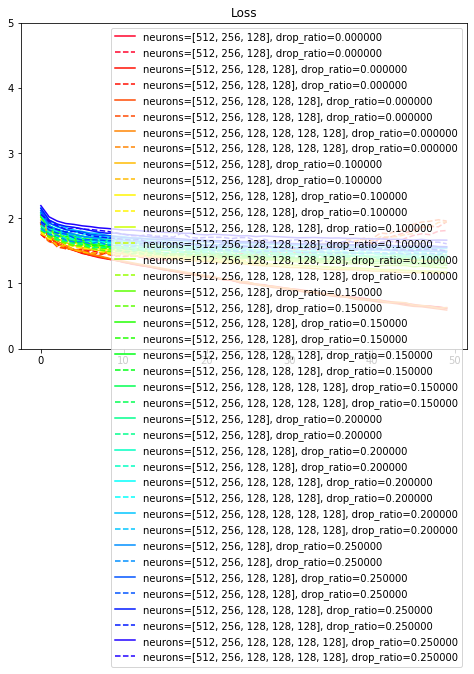

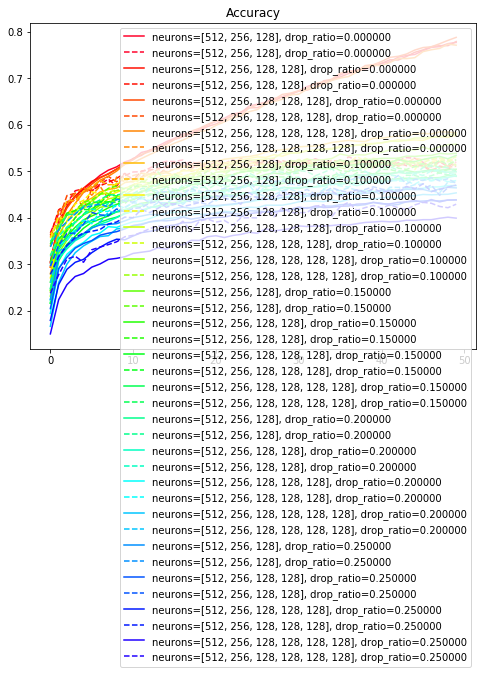

In [10]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()